### Un poco de lectura

https://serokell.io/blog/feature-engineering-for-machine-learning

https://www.researchgate.net/figure/Time-consuming-activities-of-data-science-5_fig1_343441512

https://www.ibm.com/docs/es/spss-modeler/saas?topic=dm-crisp-help-overview

### Las librerías de siempre

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

### Nuestros datos

In [2]:
directorio_data = '../data/'

x_training_file = directorio_data + 'x_traininig.csv'

In [3]:
df = pd.read_csv(x_training_file)

In [4]:
df.head()

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
0,7377,3.250000,3.000,3.000000,3.250000,3.250000,5.2
1,21753,4.150000,4.175,4.400000,4.125000,4.125000,4.2
2,5330,4.000000,4.000,4.000000,4.000000,4.500000,8.0
3,67188,4.125000,3.875,3.750000,4.125000,4.000000,6.0
4,16542,4.208333,3.750,4.333333,4.083333,4.083333,6.7


### Manejo de outliers

### Manejo de datos faltantes

### Discretización (o categorización)

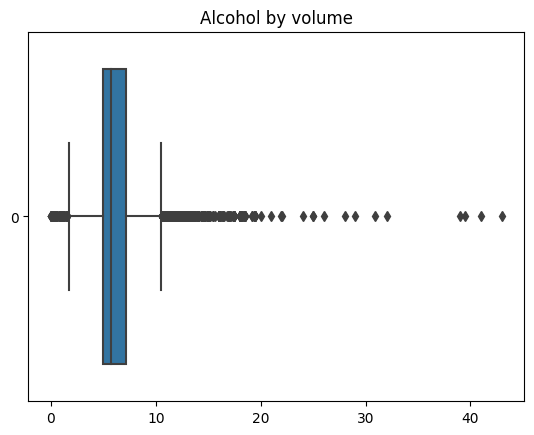

In [5]:
data = df['beer_abv']
titulo = 'Alcohol by volume'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

https://www.birra365.com/13-cervezas-por-graduacion

* CERVEZAS MUY SUAVES de 0% a 3% (ABV)
* CERVEZAS SUAVES de 3% a 6% (ABV)
* CERVEZAS COMPLEJAS de 6% a 9% (ABV)
* CERVEZAS POTENTES de 9% a 12% (ABV)
* CERVEZAS ALTA GRADUACION + 12% (ABV)

In [7]:
conditions = [
    (df['beer_abv'] < 3),
    (df['beer_abv'] >= 3) & (df['beer_abv'] < 6),
    (df['beer_abv'] >= 6) & (df['beer_abv'] < 9),
    (df['beer_abv'] >= 9) & (df['beer_abv'] < 12),
    (df['beer_abv'] >= 12)
]

values = ['MUY SUAVE', 'SUAVE', 'COMPLEJA', 'POTENTE', 'ALTA GRADUACION']

df['potencia_alcoholica'] = pd.Categorical(np.select(conditions, values), values)

df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA
...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE


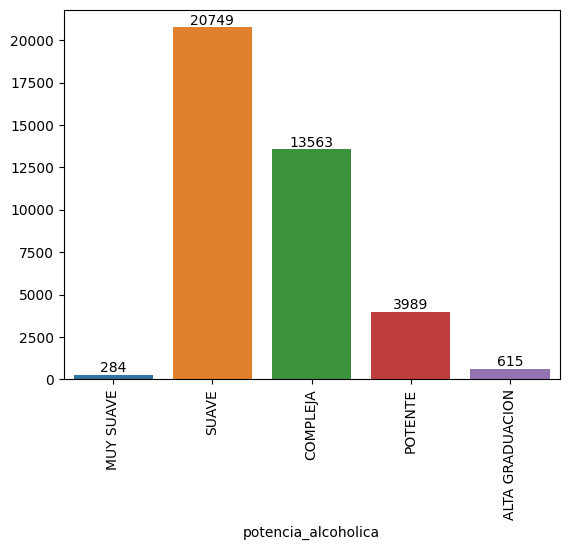

In [8]:
result = df.groupby(['potencia_alcoholica']).size()

g = sns.barplot(x = result.index, y = result.values)
g.bar_label(g.containers[0])
_= plt.setp(g.get_xticklabels(), rotation=90)

### Codificación categórica (one hot encoding)

In [9]:
df['potencia_alcoholica_muy_suave'] = 0
df['potencia_alcoholica_suave'] = 0
df['potencia_alcoholica_compleja'] = 0
df['potencia_alcoholica_potente'] = 0
df['potencia_alcoholica_alta_graduacion'] = 0

df.loc[df['potencia_alcoholica'] == 'MUY SUAVE', 'potencia_alcoholica_muy_suave'] = 1
df.loc[df['potencia_alcoholica'] == 'SUAVE', 'potencia_alcoholica_suave'] = 1
df.loc[df['potencia_alcoholica'] == 'COMPLEJA', 'potencia_alcoholica_compleja'] = 1
df.loc[df['potencia_alcoholica'] == 'POTENTE', 'potencia_alcoholica_potente'] = 1
df.loc[df['potencia_alcoholica'] == 'ALTA GRADUACION', 'potencia_alcoholica_alta_graduacion'] = 1

df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0


### Estandarización

In [10]:
review_overall_mean = df['review_overall'].mean()
review_overall_std = df['review_overall'].std()
df['review_overall_estandarizado'] = (df['review_overall'] - review_overall_mean) /review_overall_std
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion,review_overall_estandarizado
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0,-0.661963
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0,0.802378
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0,0.558321
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0,0.761702
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0,0.897289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0,0.151560
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0,-0.138342
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0,-0.051821
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0,0.407669


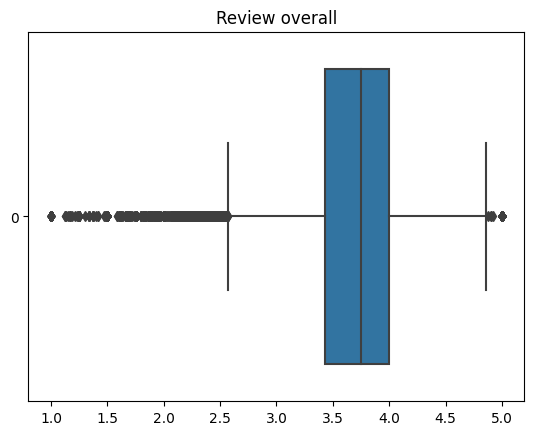

In [11]:
data = df['review_overall']
titulo = 'Review overall'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

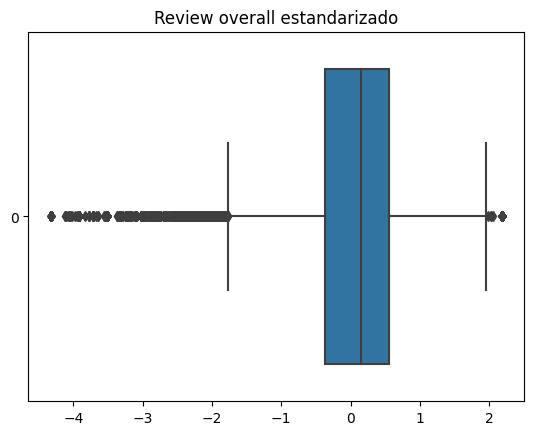

In [12]:
data = df['review_overall_estandarizado']
titulo = 'Review overall estandarizado'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

### Escalamiento

In [13]:
porcentaje_alcohol_heineken = 5

df['veces_porcentaje_alcohol_heineken'] = df['beer_abv']/porcentaje_alcohol_heineken
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion,review_overall_estandarizado,veces_porcentaje_alcohol_heineken
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0,-0.661963,1.04
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0,0.802378,0.84
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0,0.558321,1.60
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0,0.761702,1.20
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0,0.897289,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0,0.151560,1.02
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0,-0.138342,1.00
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0,-0.051821,1.00
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0,0.407669,0.80


### Creación de nuevas características

In [15]:
df['puntuacion_promedio'] = (df['review_overall'] + df['review_aroma'] + df['review_appearance'] + df['review_palate'] + df['review_taste'])/5
df['puntuacion_multiplicada'] = df['review_overall'] * df['review_aroma'] * df['review_appearance'] * df['review_palate'] * df['review_taste'] * df['beer_abv'] * df['beer_abv']
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion,review_overall_estandarizado,veces_porcentaje_alcohol_heineken,puntuacion_promedio,puntuacion_multiplicada
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0,-0.661963,1.04,3.150000,8354.092500
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0,0.802378,0.84,4.195000,22882.514150
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0,0.558321,1.60,4.100000,73728.000000
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0,0.761702,1.20,3.975000,35605.195312
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0,0.897289,1.34,4.091667,51185.007440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0,0.151560,1.02,3.650000,16642.335938
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0,-0.138342,1.00,3.433702,11915.718371
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0,-0.051821,1.00,3.762500,18822.246647
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0,0.407669,0.80,3.629630,10016.582808


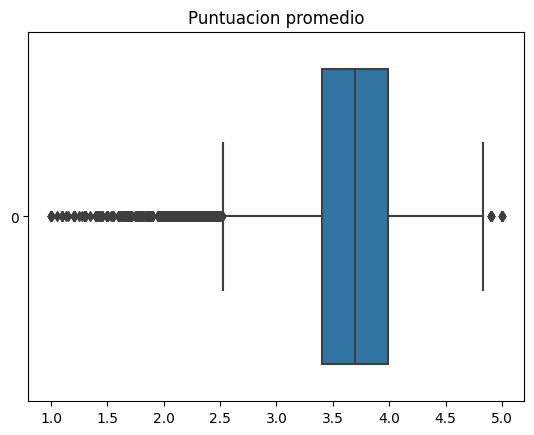

In [16]:
data = df['puntuacion_promedio']
titulo = 'Puntuacion promedio'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

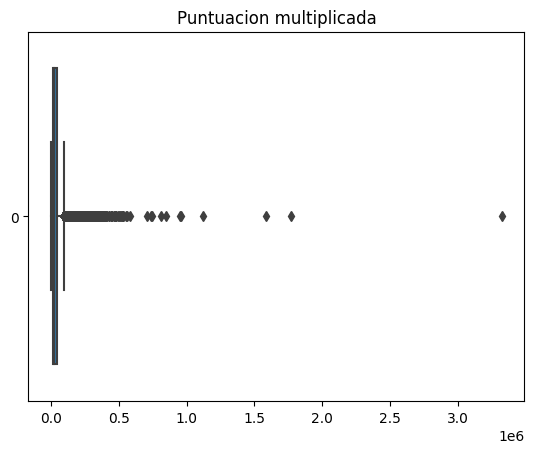

In [17]:
data = df['puntuacion_multiplicada']
titulo = 'Puntuacion multiplicada'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

### Transformación de variables

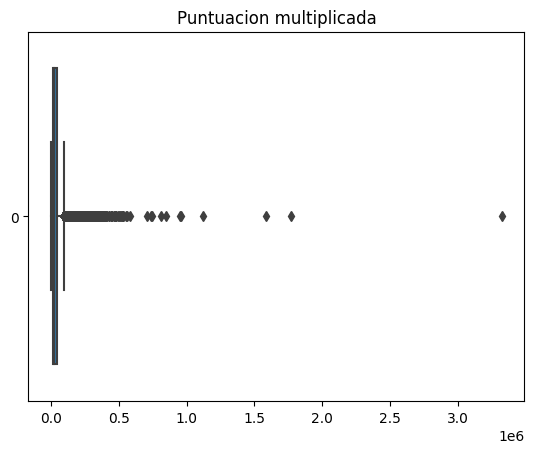

In [15]:
data = df['puntuacion_multiplicada']
titulo = 'Puntuacion multiplicada'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()

In [19]:
df['natural_log_puntuacion_multiplicada'] = np.log(df['puntuacion_multiplicada'])
df

,beer_beerid,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,potencia_alcoholica,potencia_alcoholica_muy_suave,potencia_alcoholica_suave,potencia_alcoholica_compleja,potencia_alcoholica_potente,potencia_alcoholica_alta_graduacion,review_overall_estandarizado,veces_porcentaje_alcohol_heineken,puntuacion_promedio,puntuacion_multiplicada,natural_log_puntuacion_multiplicada
0,7377,3.250000,3.000000,3.000000,3.250000,3.250000,5.2,SUAVE,0,1,0,0,0,-0.661963,1.04,3.150000,8354.092500,9.030507
1,21753,4.150000,4.175000,4.400000,4.125000,4.125000,4.2,SUAVE,0,1,0,0,0,0.802378,0.84,4.195000,22882.514150,10.038128
2,5330,4.000000,4.000000,4.000000,4.000000,4.500000,8.0,COMPLEJA,0,0,1,0,0,0.558321,1.60,4.100000,73728.000000,11.208138
3,67188,4.125000,3.875000,3.750000,4.125000,4.000000,6.0,COMPLEJA,0,0,1,0,0,0.761702,1.20,3.975000,35605.195312,10.480247
4,16542,4.208333,3.750000,4.333333,4.083333,4.083333,6.7,COMPLEJA,0,0,1,0,0,0.897289,1.34,4.091667,51185.007440,10.843202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39195,44681,3.750000,3.250000,3.750000,4.000000,3.500000,5.1,SUAVE,0,1,0,0,0,0.151560,1.02,3.650000,16642.335938,9.719705
39196,41195,3.571823,3.350829,3.486188,3.389503,3.370166,5.0,SUAVE,0,1,0,0,0,-0.138342,1.00,3.433702,11915.718371,9.385614
39197,16000,3.625000,3.687500,3.812500,3.812500,3.875000,5.0,SUAVE,0,1,0,0,0,-0.051821,1.00,3.762500,18822.246647,9.842795
39198,11281,3.907407,3.444444,3.462963,3.555556,3.777778,4.0,SUAVE,0,1,0,0,0,0.407669,0.80,3.629630,10016.582808,9.211997


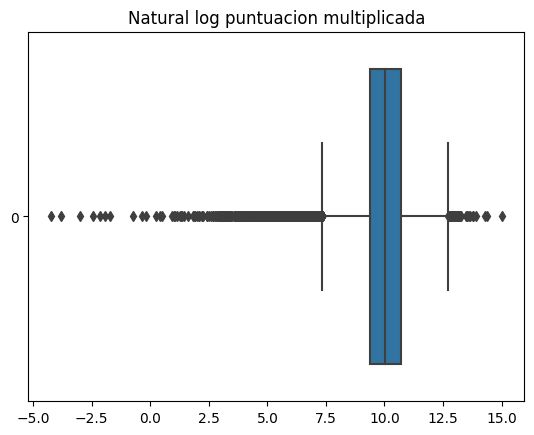

In [21]:
data = df['natural_log_puntuacion_multiplicada']
titulo = 'Natural log puntuacion multiplicada'
g1 = sns.boxplot(data=data, orient='h')
g1.set(title=titulo)
plt.show()